In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [23]:
data = pd.read_csv('AL_Dados.csv')
data = data[['Município', 'Estabelecimentos de Saúde 2021', 'Densidade demografica 2021', 'IDHM [2010]']]
# data.set_index(['Município'], inplace=True)
data


,Município,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010]
0,Maceió,1614,2025.44,0.721
1,Satuba,15,340.26,0.660
2,Arapiraca,342,677.87,0.649
3,Rio Largo,47,257.51,0.643
4,Marechal Deodoro,12,154.99,0.642
...,...,...,...,...
97,Roteiro,6,51.46,0.505
98,Mata Grande,11,27.55,0.504
99,Olho d'Água Grande,8,43.87,0.503
100,Olivença,8,66.63,0.493


In [24]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 9.79992358e+00,  9.25983635e+00,  3.99780557e+00],
       [-1.39123997e-01,  1.10429561e+00,  2.44944913e+00],
       [ 1.89343920e+00,  2.73818167e+00,  2.17023731e+00],
       [ 5.97812706e-02,  7.03821482e-01,  2.01793995e+00],
       [-1.57771365e-01,  2.07669121e-01,  1.99255706e+00],
       [ 3.27060223e-01,  2.45804906e-01,  1.89102549e+00],
       [ 3.58139171e-01, -9.24807952e-02,  1.68796235e+00],
       [ 3.83916417e-03, -2.31666729e-01,  1.58643078e+00],
       [ 6.59970602e-02,  3.56195418e-01,  1.51028210e+00],
       [-1.82634524e-01,  7.31106674e-03,  1.30721896e+00],
       [ 1.53018115e-01, -1.38166303e-01,  1.23107029e+00],
       [-9.56134695e-02,  1.15814148e-01,  1.18030450e+00],
       [-1.63987155e-01,  1.60870513e-01,  1.05339004e+00],
       [-8.93976799e-02,  1.45383900e-01,  1.02800715e+00],
       [ 2.87023226e-02, -1.89804478e-01,  8.50326899e-01],
       [-1.88850314e-01,  6.89254387e-01,  8.50326899e-01],
       [-1.20476628e-01, -2.59881402e-01

In [25]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
labels

array([1, 2, 4, 2, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 2, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 0, 2, 0, 3, 0, 3, 3, 3, 0, 0, 2, 0, 3, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
data["Cluster"] = labels
data.head(5)

,Município,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010],Cluster
0,Maceió,1614,2025.44,0.721,1
1,Satuba,15,340.26,0.660,2
2,Arapiraca,342,677.87,0.649,4
3,Rio Largo,47,257.51,0.643,2
4,Marechal Deodoro,12,154.99,0.642,3


In [27]:
data.groupby('Cluster').mean()


,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010]
Cluster,,,
0,13.491228,51.347368,0.547895
1,1614.000000,2025.440000,0.721000
2,26.142857,237.392857,0.601000
3,25.138889,115.006389,0.574167
4,342.000000,677.870000,0.649000


/tmp/ipykernel_33842/852350574.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 2], X[:, 1], X[:, 0], c= labels.astype(np.float), s=180)


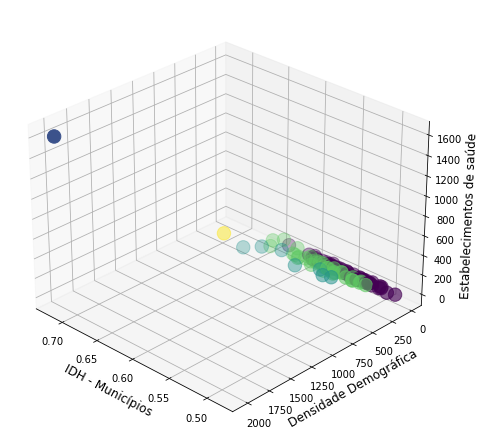

In [28]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=134)

plt.cla()
ax.set_xlabel('IDH - Municípios', fontsize=12)
ax.set_ylabel('Densidade Demográfica', fontsize=12)
ax.set_zlabel('Estabelecimentos de saúde', fontsize=12)

ax.scatter(X[:, 2], X[:, 1], X[:, 0], c= labels.astype(np.float), s=180)

## Filtragem dos dados de vacinação por cidade

In [29]:
# O dataset foi disponibilizado em três partes, cada qual com 900 Mb

df_vacina_part1 = pd.read_csv('vacina-1.csv', delimiter=";")
df_vacina_part1 = df_vacina_part1[['vacina_descricao_dose', 'estabelecimento_municipio_nome']]
print(df_vacina_part1.shape)

/home/khrir/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1898728, 2)


In [30]:
df_vacina_part2 = pd.read_csv('vacina-2.csv', delimiter=";")
df_vacina_part2 = df_vacina_part2[['vacina_descricao_dose', 'estabelecimento_municipio_nome']]
print(df_vacina_part2.shape)

(1894917, 2)


In [31]:
df_vacina_part3 = pd.read_csv('vacina-3.csv', delimiter=";")
df_vacina_part3 = df_vacina_part3[['vacina_descricao_dose', 'estabelecimento_municipio_nome']]
print(df_vacina_part3.shape)

(1901199, 2)


In [39]:
vacina_desc_2dose = "2ª Dose"

# Filtrar as pessoas que tomaram a 2° dose da vacina, em tese, estão imunizadas
# Agrupar por cidade de modo a descobrir quantas pessoas foram vacinadas em cada cidade
def filtrar(csv):
    df_filtered_2dose = csv.loc[(csv['vacina_descricao_dose'] == vacina_desc_2dose) & (csv["vacina_descricao_dose"].notnull())]

    print("Formato da aplicação da segunda dose: ", df_filtered_2dose.shape)

    df_groupped = df_filtered_2dose.groupby('estabelecimento_municipio_nome').count()
    df_groupped.rename(columns={'vacina_descricao_dose': '2a_dose'}, inplace=True)
    
    print(df_groupped.head(5))
    return df_groupped


In [40]:
vacina_part1 = filtrar(df_vacina_part1)
print("----------------------------------------------------------")
vacina_part2 = filtrar(df_vacina_part2)
print("----------------------------------------------------------")
vacina_part3 = filtrar(df_vacina_part3)

Formato da aplicação da segunda dose:  (713441, 2)
                                2a_dose
estabelecimento_municipio_nome         
AGUA BRANCA                        4741
ANADIA                             3715
ARAPIRACA                         48207
ATALAIA                            8178
BARRA DE SANTO ANTONIO             2734
----------------------------------------------------------
Formato da aplicação da segunda dose:  (712414, 2)
                                2a_dose
estabelecimento_municipio_nome         
AGUA BRANCA                        4705
ANADIA                             3554
ARAPIRACA                         48719
ATALAIA                            8431
BARRA DE SANTO ANTONIO             2740
----------------------------------------------------------
Formato da aplicação da segunda dose:  (714645, 2)
                                2a_dose
estabelecimento_municipio_nome         
AGUA BRANCA                        4798
ANADIA                             3627
ARAPIRACA

In [48]:
# Produção de dataset com o total de imunizados em cada cidade
vacina_full = vacina_part1 + vacina_part2 + vacina_part3
vacina_full.to_csv('Número_vacinados.csv')

## 2th Clusterização

In [65]:
df_Dados_2th_clus = pd.read_csv('AL_Dados_2th_Clusterização.csv')
df_Dados_2th_clus = df_Dados_2th_clus[['Município', 'Densidade demografica 2021', 'Estabelecimentos/10k_habitantes', 'Óbitos/10k_habitantes']]
df_Dados_2th_clus.head()

,Município,Densidade demografica 2021,Estabelecimentos/10k_habitantes,Óbitos/10k_habitantes
0,Água Branca,43.28,10.86,14.81
1,Anadia,94.06,6.85,21.13
2,Arapiraca,677.87,14.60,23.90
3,Atalaia,89.15,6.31,11.78
4,Barra de Santo Antônio,123.33,7.41,20.37


In [66]:
X_2th = df_Dados_2th_clus.values[:,1:]
X_2th = np.nan_to_num(X_2th)
Clus_2th = StandardScaler().fit_transform(X_2th)
Clus_2th

array([[-3.32958856e-01,  1.63401944e-01, -1.92427536e-01],
       [-8.72056677e-02, -5.62903892e-01,  1.60830293e-01],
       [ 2.73818167e+00,  8.40804394e-01,  3.15660070e-01],
       [-1.10967939e-01, -6.60710663e-01, -3.61790071e-01],
       [ 5.44484448e-02, -4.61474648e-01,  1.18349921e-01],
       [ 7.31106674e-03, -8.47374565e-02, -3.57318453e-01],
       [-2.59881402e-01, -3.58340711e-02, -3.23222365e-01],
       [-2.35441591e-01,  3.39091884e-01,  1.70332482e-01],
       [-4.45140009e-01,  6.23456014e-01, -3.54523692e-01],
       [ 1.45383900e-01, -2.83973471e-01, -1.26586247e-03],
       [-2.42168588e-01,  1.07253612e-01, -1.62244114e-01],
       [-3.54785301e-01,  1.86948018e-01, -4.05947300e-01],
       [ 5.55053207e-01, -5.33924108e-01, -1.58331448e-01],
       [-3.04859479e-02, -5.04944324e-01, -5.38977938e-01],
       [ 3.55130714e-01, -8.97982644e-01, -2.10872961e-01],
       [-2.70044491e-01, -1.01038585e-01, -3.77999687e-01],
       [-4.00180435e-01, -5.77393784e-01

In [67]:
k_means_2th = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means_2th.fit(X_2th)
labels_2th = k_means_2th.labels_
labels_2th

array([0, 3, 2, 3, 3, 3, 0, 0, 0, 3, 0, 0, 4, 3, 4, 0, 0, 0, 3, 0, 3, 3,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       4, 3, 1, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 4, 0, 4, 3, 0, 0,
       3, 0, 3, 4, 3, 3, 4, 0, 0, 3, 3, 0, 3, 0], dtype=int32)

In [69]:
df_Dados_2th_clus["Cluster"] = labels_2th
df_Dados_2th_clus.head(5)

,Município,Densidade demografica 2021,Estabelecimentos/10k_habitantes,Óbitos/10k_habitantes,Cluster
0,Água Branca,43.28,10.86,14.81,0
1,Anadia,94.06,6.85,21.13,3
2,Arapiraca,677.87,14.60,23.90,2
3,Atalaia,89.15,6.31,11.78,3
4,Barra de Santo Antônio,123.33,7.41,20.37,3


In [70]:
df_Dados_2th_clus.groupby('Cluster').mean()

,Densidade demografica 2021,Estabelecimentos/10k_habitantes,Óbitos/10k_habitantes
Cluster,,,
0,51.902241,10.719655,21.092069
1,2025.440000,15.650000,29.140000
2,677.870000,14.600000,23.900000
3,115.905714,8.718571,13.896286
4,237.392857,8.365714,14.145714


/tmp/ipykernel_33842/135990447.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax_2th.scatter(X_2th[:, 2], X_2th[:, 1], X_2th[:, 0], c= labels_2th.astype(np.float), s=180)


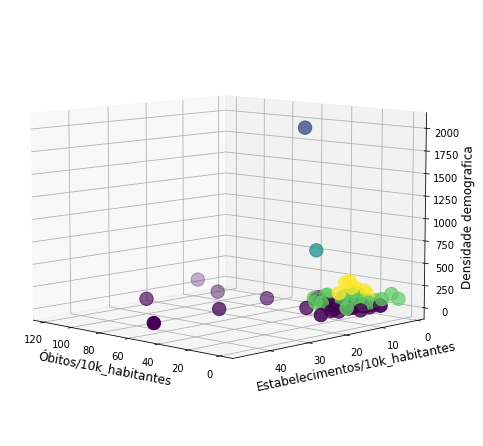

In [76]:
fig_2th = plt.figure(1, figsize=(8, 6))
plt.clf()
ax_2th = Axes3D(fig_2th, rect=[0, 0, .95, 1], elev=8, azim=134)

plt.cla()
ax_2th.set_xlabel('Óbitos/10k_habitantes', fontsize=12)
ax_2th.set_ylabel('Estabelecimentos/10k_habitantes', fontsize=12)
ax_2th.set_zlabel('Densidade demografica', fontsize=12)

ax_2th.scatter(X_2th[:, 2], X_2th[:, 1], X_2th[:, 0], c= labels_2th.astype(np.float), s=180)